In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from src.dm import DataModule

trans = {
    'Resize': {
        'width': 224,
        'height': 224
    }
}

dm = DataModule(train_trans=trans, batch_size=5)
dm.setup()

In [67]:
imgs, masks = next(iter(dm.train_dataloader()))
imgs.shape, masks.shape

(torch.Size([5, 2, 224, 224]), torch.Size([5, 224, 224, 8]))

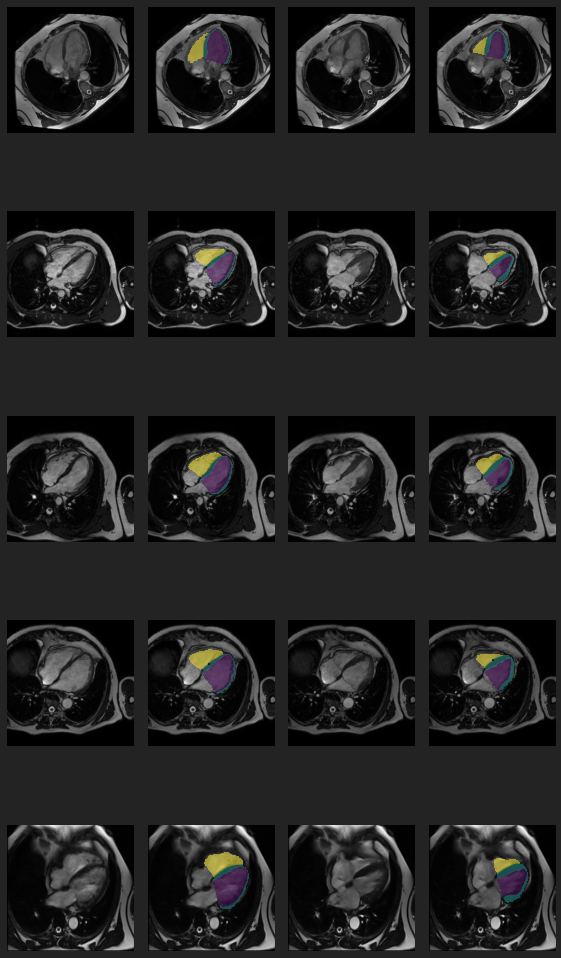

In [68]:
import matplotlib.pyplot as plt
import random
import torch

fig = plt.figure(figsize=(8, 3*len(imgs)))
for i in range(len(imgs)):
    ax = plt.subplot(len(imgs), 4, i*4 + 1)
    img = imgs[i]
    ax.imshow(img[0],cmap='gray')
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 2)
    mask = torch.argmax(masks[i][...,:4], axis=-1).float().numpy()
    mask[mask == 0] = np.nan
    ax.imshow(img[0], cmap="gray")
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 3)
    ax.imshow(img[1],cmap='gray')
    ax.axis('off')
    ax = plt.subplot(len(imgs), 4, i*4 + 4)
    mask = torch.argmax(masks[i][...,4::], axis=-1).float().numpy()
    mask[mask == 0] = np.nan
    ax.imshow(img[1], cmap="gray")
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
from src.models import SMP

model = SMP({'model': 'Unet', 'backbone': 'resnet18', 'num_channels': 2, 'pretrained': 'imagenet'})

output = model(imgs)
output.shape

torch.Size([5, 8, 224, 224])